# Poison Mushrooms 

An application example of multiple logistic regression.

Here we will have to encode the categories, then build the model.

In [1]:
attributes=['poison-class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
len(attributes)

23

In [2]:
import sys # Module to process commands to/from the OS using a shell-type syntax
import requests
remote_url="http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/logisticregression/agaricus-lepiota.data"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('poisonmushroom.csv','wb') # open connection to a local file same name as remote
localfile.write(rget.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file
# delete file if it exists

In [3]:
import pandas as pd
mymushroom = pd.read_csv('poisonmushroom.csv',header=None)


In [4]:
req_col_names = attributes
curr_col_names = list(mymushroom.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

mymushroom = mymushroom.rename(columns=mapper)
interim = pd.DataFrame(mymushroom)
mymushroom.head(20)

poison-class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0             p         x           s         n       t    p               f   
1             e         x           s         y       t    a               f   
2             e         b           s         w       t    l               f   
3             p         x           y         w       t    p               f   
4             e         x           s         g       f    n               f   
5             e         x           y         y       t    a               f   
6             e         b           s         w       t    a               f   
7             e         b           y         w       t    l               f   
8             p         x           y         w       t    p               f   
9             e         b           s         y       t    a               f   
10            e         x           y         y       t    l               f   
11            e         x           y         y       t    a               f   
12            e         b           s         y       t    a               f   
13            p         x           y         w       t    p               f   
14            e         x           f         n       f    n               f   
15            e         s           f         g       f    n               f   
16            e         f           f         w       f    n               f   
17            p         x           s         n       t    p               f   
18            p         x           y         w       t    p               f   
19            p         x           s         n       t    p               f   

   gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0             c         n          k  ...                        s   
1             c         b          k  ...                        s   
2             c         b          n  ...                        s   
3             c         n          n  ...                        s   
4             w         b          k  ...                        s   
5             c         b          n  ...                        s   
6             c         b          g  ...                        s   
7             c         b          n  ...                        s   
8             c         n          p  ...                        s   
9             c         b          g  ...                        s   
10            c         b          g  ...                        s   
11            c         b          n  ...                        s   
12            c         b          w  ...                        s   
13            c         n          k  ...                        s   
14            w         b          n  ...                        f   
15            c         n          k  ...                        s   
16            w         b          k  ...                        s   
17            c         n          n  ...                        s   
18            c         n          n  ...                        s   
19            c         n          k  ...                        s   

   stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                       w                      w         p          w   
1                       w                      w         p          w   
2                       w                      w         p          w   
3                       w                      w         p          w   
4                       w                      w         p          w   
5                       w                      w         p          w   
6                       w                      w         p          w   
7                       w                      w         p          w   
8                       w                      w         p          w   
9                       w                      w         p          w   
10                      w                      w

In [5]:
mymushroom.head(10)

poison-class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            p         x           s         n       t    p               f   
1            e         x           s         y       t    a               f   
2            e         b           s         w       t    l               f   
3            p         x           y         w       t    p               f   
4            e         x           s         g       f    n               f   
5            e         x           y         y       t    a               f   
6            e         b           s         w       t    a               f   
7            e         b           y         w       t    l               f   
8            p         x           y         w       t    p               f   
9            e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   
5            c         b          n  ...                        s   
6            c         b          g  ...                        s   
7            c         b          n  ...                        s   
8            c         n          p  ...                        s   
9            c         b          g  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   
5                      w                      w         p          w   
6                      w                      w         p          w   
7                      w                      w         p          w   
8                      w                      w         p          w   
9                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  
5           o         p                 k          n       g  
6           o         p                 k          n       m  
7           o         p                 n          s       m  
8           o         p                 k          v       g  
9           o         p                 k          s       m  

[10 rows x 23 columns]

In [6]:
def p0(stringvalue):
    if stringvalue == 'e':
        p0 = 0
    elif stringvalue == 'p':
        p0 = 1
    else: 
        raise Exception("Encoding failed in p0 missing data maybe?")
    return(p0)
######################################################################
# Feature Encoding Functions using a Simple Substitution Cipher     ##
######################################################################
def c1(stringvalue):
#cap-shape:  bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
    ncode=True # set exception flag
    alphabet=['b','c','x','f','k','s']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c1=i
            ncode=False #  if encoding swithc flag value
    if ncode:
        raise Exception("Encoding failed in c1 missing data maybe?")
    return(c1)
######################################################################
def c2(stringvalue):
#cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
    ncode=True
    alphabet=['f','g','y','s']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c2=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c2 missing data maybe?")
    return(c2)
######################################################################
def c3(stringvalue):
#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
    ncode=True
    alphabet=['n','b','c','g','r','p','u','e','w','y']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c3=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c3 missing data maybe?")
    return(c3)
######################################################################
def c4(stringvalue): #this is a simple binary encoding column
#bruises?:bruises=t,no=f
    ncode=True
    alphabet=['f','t']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c4=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c4 missing data maybe?")
    return(c4)
######################################################################
def c5(stringvalue):
#odor:  almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
    ncode=True
    alphabet=['a','l','c','y','f','m','n','p','s']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c5=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c5 missing data maybe?")
    return(c5)
######################################################################
def c6(stringvalue):
#gill-attachment: attached=a,descending=d,free=f,notched=n
    ncode=True
    alphabet=['a','d','f','n']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c6=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c6 missing data maybe?")
    return(c6)
######################################################################
def c7(stringvalue):
#gill-spacing: close=c,crowded=w,distant=d
    ncode=True
    alphabet=['c','w','d']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c7=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c7 missing data maybe?")
    return(c7)
######################################################################
def c8(stringvalue):
#gill-size:  broad=b,narrow=n
    ncode=True
    alphabet=['b','n']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c8=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c8 missing data maybe?")
    return(c8)
######################################################################
def c9(stringvalue):
#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
    ncode=True
    alphabet=['k','n','b','h','g','r','o','p','u','e','w','y']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c9=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c9 missing data maybe?")
    return(c9)
######################################################################
def c10(stringvalue):
#stalk-shape:enlarging=e,tapering=t
    ncode=True
    alphabet=['e','t']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c10=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c10 missing data maybe?")
    return(c10)
######################################################################
def c11(stringvalue):
#stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
    ncode=True
    alphabet=['b','c','u','e','z','r','?'] # set missing to zero position
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c11=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c11 missing data maybe?")
    return(c11)
######################################################################
def c12(stringvalue):
#stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    ncode=True
    alphabet=['f','y','k','s','?'] # set missing to zero position
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c12=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c12 missing data maybe?")
    return(c12)
######################################################################
def c13(stringvalue):
#stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    ncode=True
    alphabet=['f','y','k','s','?'] # set missing to zero position
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c13=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c13 missing data maybe?")
    return(c13)
######################################################################
def c14(stringvalue):
#stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    ncode=True
    alphabet=['n','b','c','g','o','p','e','w','y'] # set missing to zero position
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c14=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c14 missing data maybe?")
    return(c14)
######################################################################
def c15(stringvalue):
#stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    ncode=True
    alphabet=['n','b','c','g','o','p','e','w','y'] # set missing to zero position
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c15=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c15 missing data maybe?")
    return(c15)
######################################################################
def c16(stringvalue):
#veil-type:                partial=p,universal=u
    ncode=True
    alphabet=['p','u'] # 
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c16=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c16 missing data maybe?")
    return(c16)
######################################################################
def c17(stringvalue):
#veil-color:               brown=n,orange=o,white=w,yellow=y
    ncode=True
    alphabet=['n','o','w','y'] # 
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c17=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c17 missing data maybe?")
    return(c17)
######################################################################
def c18(stringvalue):
#ring-number:              none=n,one=o,two=t
    ncode=True
    alphabet=['n','o','t'] # 
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c18=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c18 missing data maybe?")
    return(c18)
######################################################################
def c19(stringvalue):
#ring-type:  cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
    ncode=True
    alphabet=['c','e','f','l','n','p','s','z'] # 
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c19=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c19 missing data maybe?")
    return(c19)
######################################################################
def c20(stringvalue):
#spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
    ncode=True
    alphabet=['k','n','b','h','r','o','u','w','y','?'] # 
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c20=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c20 missing data maybe?")
    return(c20)
######################################################################
def c21(stringvalue):
#population:abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
    ncode=True
    alphabet=['a','c','n','s','v','y','?'] # 
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c21=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c21 missing data maybe?")
    return(c21)
######################################################################
def c22(stringvalue):
# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d   
    ncode=True
    alphabet=['g','l','m','p','u','w','d']
    for i in range(len(alphabet)):
        if stringvalue == alphabet[i]:
            c22=i
            ncode=False
    if ncode:
        raise Exception("Encoding failed in c22 missing data maybe?")
    return(c22)

interim['poison-class']            = mymushroom['poison-class'].apply(p0)
interim['cap-shape']               = mymushroom['cap-shape'].apply(c1)
interim['cap-surface']             = mymushroom['cap-surface'].apply(c2)
interim['cap-color']               = mymushroom['cap-color'].apply(c3)
interim['bruises']                 = mymushroom['bruises'].apply(c4)
interim['odor']                    = mymushroom['odor'].apply(c5)
interim['gill-attachment']         = mymushroom['gill-attachment'].apply(c6)
interim['gill-spacing']            = mymushroom['gill-spacing'].apply(c7)
interim['gill-size']               = mymushroom['gill-size'].apply(c8)
interim['gill-color']              = mymushroom['gill-color'].apply(c9)
interim['stalk-shape']             = mymushroom['stalk-shape'].apply(c10)
interim['stalk-root']              = mymushroom['stalk-root'].apply(c11)
interim['stalk-surface-above-ring']= mymushroom['stalk-surface-above-ring'].apply(c12)
interim['stalk-surface-below-ring']= mymushroom['stalk-surface-below-ring'].apply(c13)
interim['stalk-color-above-ring']  = mymushroom['stalk-color-above-ring'].apply(c14)
interim['stalk-color-below-ring']  = mymushroom['stalk-color-below-ring'].apply(c15)
interim['veil-type']               = mymushroom['veil-type'].apply(c16)
interim['veil-color']              = mymushroom['veil-color'].apply(c17)
interim['ring-number']             = mymushroom['ring-number'].apply(c18)
interim['ring-type']               = mymushroom['ring-type'].apply(c19)
interim['spore-print-color']       = mymushroom['spore-print-color'].apply(c20)
interim['population']              = mymushroom['population'].apply(c21)
interim['habitat']                 = mymushroom['habitat'].apply(c22)

In [7]:
interim.head()

poison-class  cap-shape  cap-surface  cap-color  bruises  odor  \
0             1          2            3          0        1     7   
1             0          2            3          9        1     0   
2             0          0            3          8        1     1   
3             1          2            2          8        1     7   
4             0          2            3          3        0     6   

   gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                2             0          1           0  ...   
1                2             0          0           0  ...   
2                2             0          0           1  ...   
3                2             0          1           1  ...   
4                2             1          0           0  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         3                       7                       7   
1                         3                       7                       7   
2                         3                       7                       7   
3                         3                       7                       7   
4                         3                       7                       7   

   veil-type  veil-color  ring-number  ring-type  spore-print-color  \
0          0           2            1          5                  0   
1          0           2            1          5                  1   
2          0           2            1          5                  1   
3          0           2            1          5                  0   
4          0           2            1          1                  1   

   population  habitat  
0           3        4  
1           2        0  
2           2        2  
3           3        4  
4           0        0  

[5 rows x 23 columns]

In [8]:
#split dataset in features and target variable
#feature_cols = ['cap-shape', 'cap-surface','cap-color','bruises','odor','gill-attachment','gill-size','gill-color','habitat']
feature_cols = attributes[1:]
#feature_cols = attributes[1:16]+attributes[17:]
X = interim[feature_cols] # Features
y = interim['poison-class'] # Target variable
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
feature_cols[16]

'veil-color'

In [10]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
logreg = LogisticRegression(max_iter=1000)
# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [11]:
print(logreg.intercept_[0])
print(logreg.coef_)
#y.head()

7.985575946121393
[[-0.10794435  1.08926906  0.08797603 -3.47364929  0.14180387  0.1864682
  -8.98042887  7.73751204 -0.11238355 -0.05928835 -2.02832314 -0.7033172
  -0.05014807 -0.30924012  0.33874996  0.          0.31015366 -0.78437801
  -0.84016796  0.46958621 -0.59083624 -0.196766  ]]


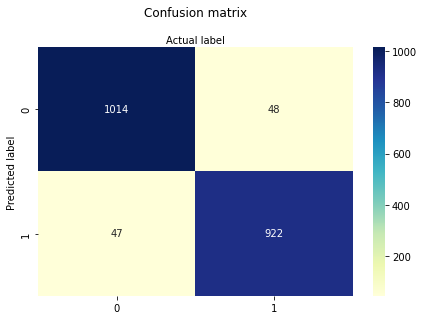

In [12]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
cnf_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label');

In [13]:
'''
/* Nonlinear Optimization using the algorithm of Hooke and Jeeves  */
'''

'\n/* Nonlinear Optimization using the algorithm of Hooke and Jeeves  */\n'